In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


##检查空值


In [3]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [4]:
def unique(col):
   return df[col].nunique()

In [5]:
##计算不同值个数
d = {} 
for i in df.columns:
    value = unique(i)
    d[i] = value
print(d,sep="\n")

{'meanfreq': 3166, 'sd': 3166, 'median': 3077, 'Q25': 3103, 'Q75': 3034, 'IQR': 3073, 'skew': 3166, 'kurt': 3166, 'sp.ent': 3166, 'sfm': 3166, 'mode': 2825, 'centroid': 3166, 'meanfun': 3166, 'minfun': 913, 'maxfun': 123, 'meandom': 2999, 'mindom': 77, 'maxdom': 1054, 'dfrange': 1091, 'modindx': 3079, 'label': 2}


In [6]:
###分离因变量和应变量
x = df.iloc[:,:-1]       ## 除了最后一列外，均为X
y = df.label             #最后一列为Y，即男性or女性

In [7]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [8]:
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [9]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [10]:
data = ['Female','Male']
d= [1584,1584]

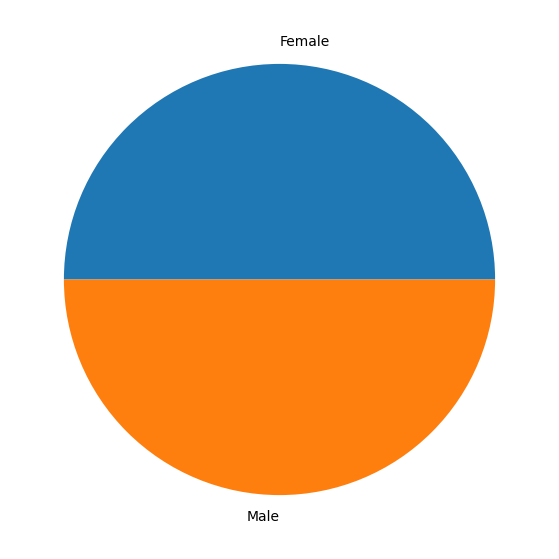

In [11]:
fig = plt.figure(figsize =(10, 7))
plt.pie(d, labels = data)

plt.show()

In [12]:
#使用一个0-1变量（哑变量）进行替代male和female两个属性
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [13]:
#将数据集拆分为训练和测试，测试大小为20%
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


###数据归一化
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(x_train)
x_train = scaler1.transform(x_train)
x_test = scaler1.transform(x_test)


###决策树分类
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier(random_state = 1)
model = DTmodel.fit(x_train,y_train)    #拟合模型

y_pred1 = DTmodel.predict(x_test)     #返回预测标签 
y_pred1 = np.array(y_pred1)           

print(y_pred1[:10])            #输出前十个预测标签 

[0 0 1 1 1 0 0 0 1 0]


In [14]:
#y_pred_validation = DTmodel.predict_proba(x_test)
#print(y_pred_validation)

In [15]:
from sklearn.metrics import plot_roc_curve,roc_curve,auc,roc_auc_score
score_DT = DTmodel.predict_proba(x_test)[:,1]
print("DecisionTreeClassifier的AUC为:",roc_auc_score(y_test,score_DT))   #测试

DecisionTreeClassifier的AUC为: 0.9652996845425867


In [16]:
from sklearn.metrics import classification_report,accuracy_score
pd.crosstab(y_pred1,y_test,rownames=['matrix'],colnames=['confusion'],margins = True)

confusion,0,1,All
matrix,,,
0,306,11,317
1,11,306,317
All,317,317,634


In [17]:
print("\t\t\tDecision Tree Class report:\n",classification_report(y_pred1,y_test))

			Decision Tree Class report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       317
           1       0.97      0.97      0.97       317

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [18]:
print("Decision Tree Accuracy score: ",accuracy_score(y_pred1,y_test)*100,"%")

Decision Tree Accuracy score:  96.52996845425868 %


In [19]:
###随机森林
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(random_state = 200)
RFmodel.fit(x_train,y_train)
y_pred2 = RFmodel.predict(x_test)
print(y_pred2[:10])

[0 0 1 1 1 0 0 0 1 0]


In [20]:
print('score of Random forest model is: ',RFmodel.score(x_test,y_test))

score of Random forest model is:  0.9826498422712934


In [21]:
pd.crosstab(y_pred2,y_test,rownames=['matrix'],colnames=['confusion'],margins = True)

confusion,0,1,All
matrix,,,
0,312,6,318
1,5,311,316
All,317,317,634


In [22]:
print("\t\t\tRandom Forest Class report:\n",classification_report(y_pred2,y_test))

			Random Forest Class report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       318
           1       0.98      0.98      0.98       316

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [23]:
print("Random Forest Accuracy score: ",accuracy_score(y_pred2,y_test)*100,"%")

Random Forest Accuracy score:  98.26498422712933 %


In [24]:
###逻辑回归
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(max_iter=10000)
LRmodel.fit(x_train,y_train)
y_pred3 = LRmodel.predict(x_test)
print(y_pred3[:10])

[0 0 1 1 1 0 0 0 1 0]


In [25]:
print('score of Log Reg model is: ',LRmodel.score(x_test,y_test))

score of Log Reg model is:  0.9779179810725552


In [26]:
pd.crosstab(y_pred3,y_test,rownames=['matrix'],colnames=['confusion'],margins = True)

confusion,0,1,All
matrix,,,
0,310,7,317
1,7,310,317
All,317,317,634


In [27]:
print("\t\t\tLog Reg Class report:\n",classification_report(y_pred2,y_test))

			Log Reg Class report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       318
           1       0.98      0.98      0.98       316

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [28]:
print("Log Reg Accuracy score: ",accuracy_score(y_pred3,y_test)*100,"%")

Log Reg Accuracy score:  97.79179810725552 %


In [29]:
###KNN分类器
from sklearn.neighbors import KNeighborsClassifier
KNmodel = KNeighborsClassifier(n_neighbors =15, metric = 'minkowski', p = 1)
KNmodel.fit(x_train, y_train)
y_pred4 = KNmodel.predict(x_test)
y_pred4[:10]

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [30]:
print('score of KNN model is: ', KNmodel.score(x_test,y_test))

score of KNN model is:  0.9621451104100947


In [31]:
pd.crosstab(y_pred4,y_test,rownames=['matrix'],colnames=['confusion'],margins = True)

confusion,0,1,All
matrix,,,
0,303,10,313
1,14,307,321
All,317,317,634


In [32]:
print("\t\t\tKNN report:\n",classification_report(y_pred4,y_test))

			KNN report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       313
           1       0.97      0.96      0.96       321

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [33]:
print("KNN Accuracy score: ",accuracy_score(y_pred4,y_test)*100,"%")

KNN Accuracy score:  96.21451104100946 %


In [34]:
###SVM分类器
from sklearn.svm import SVC
SVMmodel = SVC(kernel = 'linear',probability=True)
SVMmodel.fit(x_train,y_train)
y_pred5 = SVMmodel.predict(x_test)
y_pred5[:10]
print('score of SVM model is: ', SVMmodel.score(x_test,y_test))

score of SVM model is:  0.9810725552050473


In [35]:
print(pd.crosstab(y_pred5,y_test,rownames=['matrix'],colnames=['confusion'],margins = True))

confusion    0    1  All
matrix                  
0          311    6  317
1            6  311  317
All        317  317  634


In [36]:
print("\t\t\tSVM report:\n",classification_report(y_pred5,y_test))

			SVM report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       317
           1       0.98      0.98      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [37]:
print("SVM Accuracy score: ",accuracy_score(y_pred5,y_test)*100,"%")

SVM Accuracy score:  98.10725552050474 %


Text(0.5, 0, 'False Positive Rate')

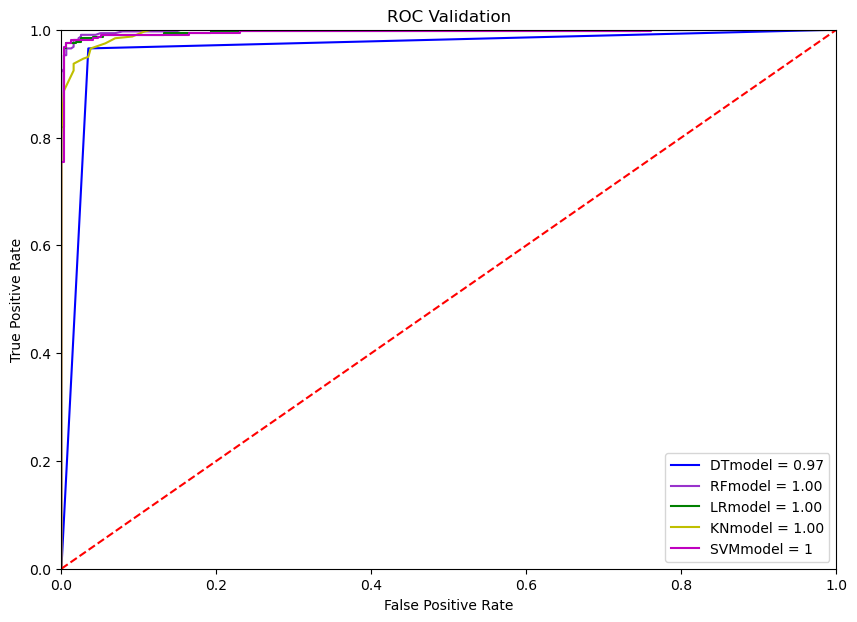

In [38]:
from sklearn.metrics import roc_curve, auc  
import matplotlib.pyplot as plt

#plt.figure()
fig = plt.figure(figsize =(10, 7))
###############画DTmodel的ROC-AUC曲线########################
prob_predict_y_validation_DTmodel = DTmodel.predict_proba(x_test)#给出带有概率值的结果，每个点所有label的概率和为1
predictions_validation_DTmodel = prob_predict_y_validation_DTmodel[:, 1]  
fpr_DTmodel, tpr_DTmodel, _ = roc_curve(y_test, predictions_validation_DTmodel) 
roc_auc_DTmodel = auc(fpr_DTmodel, tpr_DTmodel)  
plt.plot(fpr_DTmodel, tpr_DTmodel, 'b', label='DTmodel = %0.2f' % roc_auc_DTmodel) 

###############画rf的ROC-AUC曲线########################

prob_predict_y_validation_RFmodel = RFmodel.predict_proba(x_test)#给出带有概率值的结果，每个点所有label的概率和为1
predictions_validation_RFmodel = prob_predict_y_validation_RFmodel[:, 1]  
fpr_RFmodel, tpr_RFmodel, _ = roc_curve(y_test, predictions_validation_RFmodel) 
roc_auc_RFmodel = auc(fpr_RFmodel, tpr_RFmodel)  
plt.plot(fpr_RFmodel, tpr_RFmodel, '#9932CC', label='RFmodel = %0.2f' % roc_auc_RFmodel) 

###############画logistic的ROC-AUC曲线########################

prob_predict_y_validation_LRmodel = LRmodel.predict_proba(x_test) #给出带有概率值的结果，每个点所有label的概率和为1
predictions_validation_LRmodel = prob_predict_y_validation_LRmodel[:, 1]  
fpr_LRmodel, tpr_LRmodel, _ = roc_curve(y_test, predictions_validation_LRmodel) 
roc_auc_LRmodel = auc(fpr_LRmodel, tpr_LRmodel)  
plt.plot(fpr_LRmodel, tpr_LRmodel, 'g', label='LRmodel = %0.2f' % roc_auc_LRmodel) 


###############画KNN的ROC-AUC曲线########################

prob_predict_y_validation_KNmodel = KNmodel.predict_proba(x_test)#给出带有概率值的结果，每个点所有label的概率和为1
predictions_validation_KNmodel = prob_predict_y_validation_KNmodel[:, 1]  
fpr_KNmodel, tpr_KNmodel, _ = roc_curve(y_test, predictions_validation_KNmodel) 
roc_auc_KNmodel = auc(fpr_KNmodel, tpr_KNmodel)  
plt.plot(fpr_KNmodel, tpr_KNmodel, 'y', label='KNmodel = %0.2f' % roc_auc_KNmodel)

###############画SVM的ROC-AUC曲线########################

prob_predict_y_validation_SVMmodel = SVMmodel.predict_proba(x_test)#给出带有概率值的结果，每个点所有label的概率和为1
predictions_validation_SVMmodel = prob_predict_y_validation_SVMmodel[:, 1]  
fpr_SVMmodel, tpr_SVMmodel, _ = roc_curve(y_test, predictions_validation_SVMmodel) 
roc_auc_SVMmodel= auc(fpr_SVMmodel, tpr_SVMmodel)  
plt.plot(fpr_SVMmodel, tpr_SVMmodel, 'm', label='SVMmodel = %0.f' % roc_auc_SVMmodel) 


###############################roc auc公共设置##################################
plt.title('ROC Validation')  
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0, 1])  
plt.ylim([0, 1])  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate') 


In [39]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(DTmodel, prefit=True)
x_new = model.transform(x)            #对基本分类器进行训练并执行特征选择
 
print(DTmodel.feature_importances_)   #输出特征的总占比

[0.00230811 0.00296143 0.00084816 0.01275809 0.00238078 0.06320562
 0.00423932 0.00140314 0.01357726 0.01218107 0.00244231 0.00505356
 0.8458618  0.01664021 0.00105235 0.00140314 0.         0.00754654
 0.00257017 0.00156693]


In [40]:
list1 = [y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]
d =['DecTree','RandomForest','Log Regression','KNN','SuppVecMachine']
a={} 
k=0
list2 = []
for i in list1:
    list2.append(accuracy_score(i,y_test)*100)
for i in d:
    a[i] = list2[k]
    k+=1

In [41]:
print("List of all model accuracies:\n",a)

List of all model accuracies:
 {'DecTree': 96.52996845425868, 'RandomForest': 98.26498422712933, 'Log Regression': 97.79179810725552, 'KNN': 96.21451104100946, 'SuppVecMachine': 98.10725552050474}


In [42]:
print("the most accurate model is:", max(a, key=a.get))

the most accurate model is: RandomForest


In [43]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(DTmodel,prefit=True)
x_new = model.transform(x)            #对基本分类器进行训练并执行特征选择 
print(x_new)

DTmodel.feature_importances_

[[0.07512195 0.08427911]
 [0.07325232 0.10793655]
 [0.12320696 0.09870626]
 ...
 [0.19093638 0.20991768]
 [0.1764347  0.172375  ]
 [0.18075587 0.18560693]]


array([0.00230811, 0.00296143, 0.00084816, 0.01275809, 0.00238078,
       0.06320562, 0.00423932, 0.00140314, 0.01357726, 0.01218107,
       0.00244231, 0.00505356, 0.8458618 , 0.01664021, 0.00105235,
       0.00140314, 0.        , 0.00754654, 0.00257017, 0.00156693])